to see the source code of library or any method
import inspect
from sklearn import tree
inspect.getsourcelines(tree.tree)

In [2]:
%config IPCompleter.greedy=True
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [25]:
data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [3]:
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


#Storing Data in Variable

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


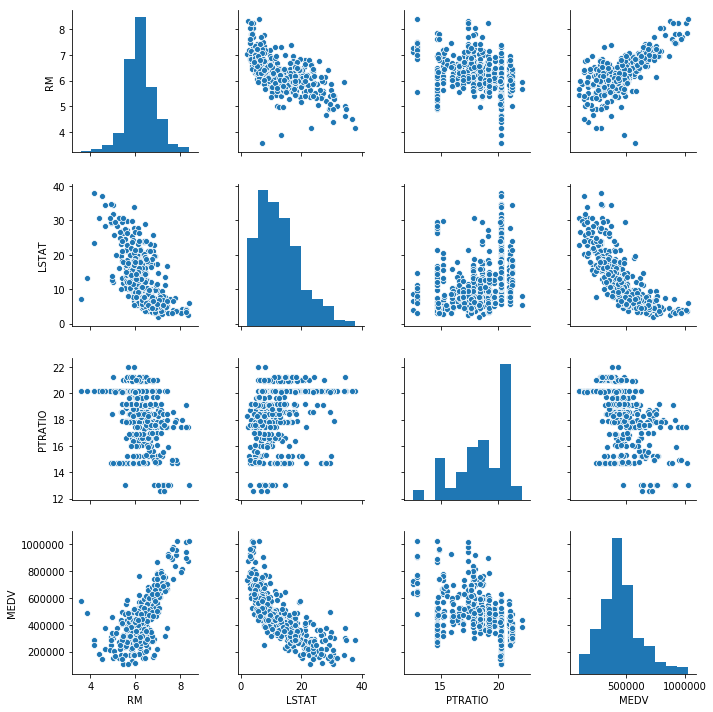

In [4]:
#Plotting 
#We can spot a linear relationship between ‘RM’ and House prices ‘MEDV’. 
#In addition, we can infer from the histogram that 
#the ‘MEDV’ variable seems to be normally distributed but contain several outliers.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Calculate and show pairplot
sns.pairplot(data, size=2.5)
plt.tight_layout()

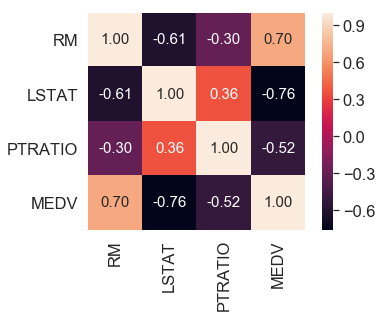

In [5]:
#correlation Matrix help to find the relation between all the attributes 
# Calculate and show correlation matrix
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=data.columns,
                xticklabels=data.columns)

It is difficult to measure the quality of a given model without quantifying its performance on the training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement.

For this project, we will calculate the coefficient of determination, R², to quantify the model’s performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how “good” that model is at making predictions.

The values for R² range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R² of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R² of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features.

A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.

In [6]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

High Variance -

The model learn too well the training data, up to the point that it memorized it and is not able to generalize on new data, thisi is called overfitting, it is caused because high variance. 

The model just had the right balance between bias and variance, it learned well and is able predict correctly the outcomes on new data.

In [7]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
# Here MEDV is prices
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


Graphing the model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

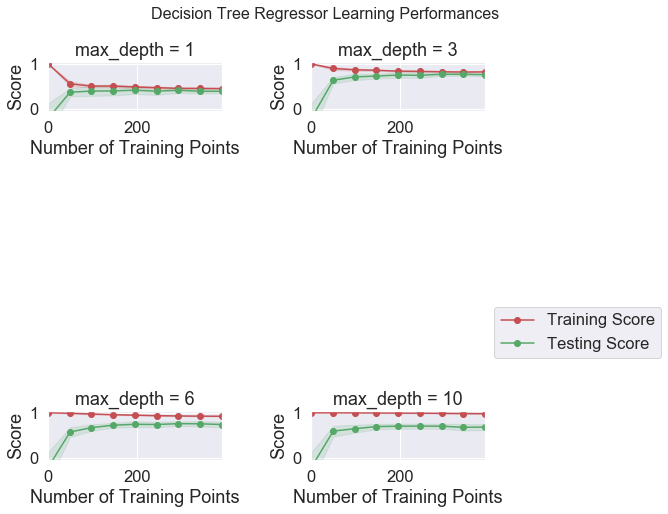

In [8]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

If we take a close look at the graph with the max depth of 3:

As the number of training points increases, the training score decreases. In contrast, the test score increases.

As both scores (training and testing) tend to converge, from the 300 points treshold, having more training points will not benefit the model.

In general, with more columns for each observation, we’ll get more information and the model will be able to learn better from the dataset and therefore, make better predictions.

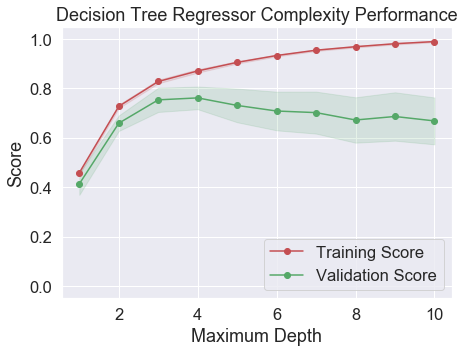

In [9]:
#uncertainity curve 
# Produce complexity curve for varying training set sizes and maximum depths
vs.ModelComplexity(X_train, y_train)

If we analize how the bias-variance vary with the maximun depth, we can infer that:

With the maximun depth of one, the graphic shows that the model does not return good score in neither training nor testing data, which is a symptom of underfitting and so, high bias. To improve performance, we should increase model’s complexity, in this case increasing the max_depth hyperparameter to get better results.

With the maximun depth of ten, the graphic shows that the model learn perfectly well from training data (with a score close to one) and also returns poor results on test data, which is an indicator of overfitting, not being able to generalize well on new data. This is a problem of High Variance. To improve performance, we should decrease the model’s complexity, in this case decreasing the max_depth hyperparameter to get better results.

From the complexity curve, we can infer that the best maximum depth for the model is 4, as it is the one that yields the best validation score.

The final implementation requires that we bring everything together and train a model using the decision tree algorithm.

To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the 'max_depth'parameter for the decision tree. The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction.

In addition, we will find your implementation is using ShuffleSplit() for an alternative form of cross-validation (see the 'cv_sets'variable). The ShuffleSplit() implementation below will create 10 ('n_splits') shuffled sets, and for each shuffle, 20% ('test_size') of the data will be used as the validation set.

In [10]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [11]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [12]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


In [13]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


The code cell below run the fit_model function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.